# 🔍 Exploratory Data Analysis

> **OVERALL GOAL:** 

> - Previously we have defined the business problem for LendingClub. We have loaded the raw data from the web which consisted 2.26 million rows and 155 columns. We dealt with missing values and eliminated some features that were not relevant. After cleaning we got a new dataset consisting of 1.34 million rows and 34 columns. 

> - We will continue to work with this dataset and try to get an understanding for which variables are important, view summary statistics, and visualize the data.

In [52]:
!pip install -q hvplot

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
import math

In [54]:
df = pd.read_csv('result1.csv', index_col=0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  int64  
 1   loan_amnt              1345310 non-null  float64
 2   funded_amnt            1345310 non-null  float64
 3   term                   1345310 non-null  object 
 4   int_rate               1345310 non-null  float64
 5   installment            1345310 non-null  float64
 6   grade                  1345310 non-null  object 
 7   sub_grade              1345310 non-null  object 
 8   emp_title              1259525 non-null  object 
 9   emp_length             1266799 non-null  object 
 10  home_ownership         1345310 non-null  object 
 11  annual_inc             1345310 non-null  float64
 12  verification_status    1345310 non-null  object 
 13  purpose                1345310 non-null  object 
 14  title             

##### `Let's first take a look at how the number of defaulted loans compare against the number of fully paid loans.`

In [56]:
df['Default'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Default', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (Default)

<AxesSubplot:>

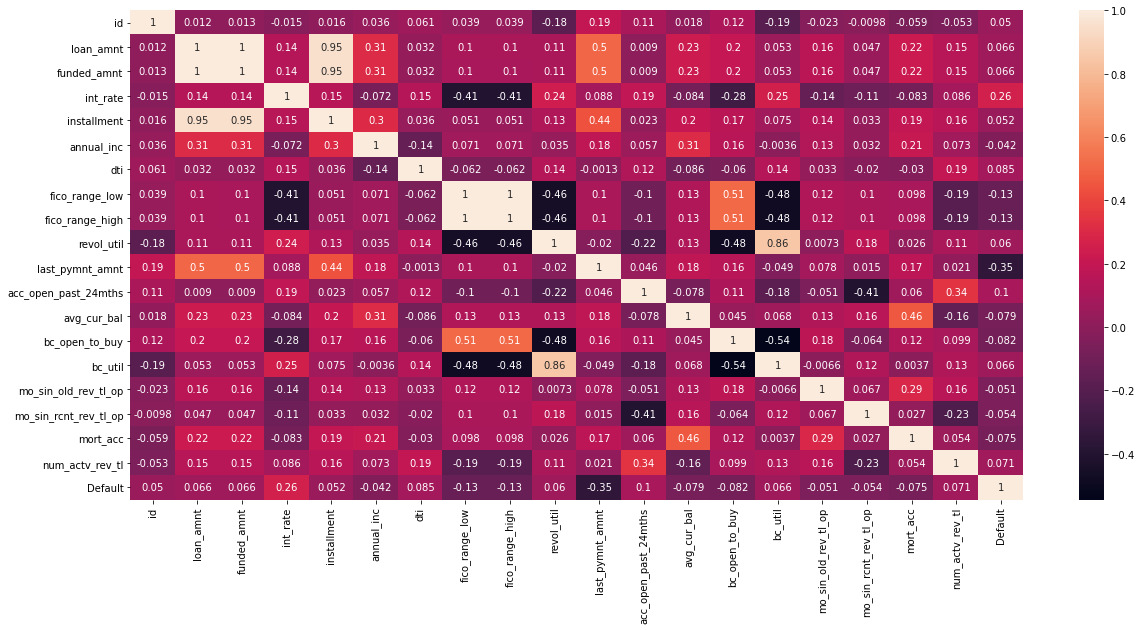

In [57]:
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)

We see that the funded_amnt and loan_amnt essentially mean the same thing looking at their correlation with other variables. So we'll just drop one of those, the funded_amnt.

In [58]:
df = df.drop("funded_amnt", axis ='columns')

In [59]:
df.head(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,application_type,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,Default
0,68407277,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,Individual,4.0,20701.0,1506.0,37.2,128.0,3.0,1.0,4.0,0
1,68355089,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,Individual,4.0,9733.0,57830.0,27.1,192.0,2.0,4.0,5.0,0
2,68341763,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,Joint App,6.0,31617.0,2737.0,55.9,184.0,14.0,5.0,3.0,0
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Individual,10.0,27644.0,4567.0,77.5,210.0,4.0,6.0,6.0,0
5,68426831,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,...,Individual,0.0,2560.0,844.0,91.0,54.0,32.0,0.0,3.0,0


In [60]:
df = df.drop("zip_code", axis = "columns")

Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

 From the heatmap, we noticed almost perfect correlation between "`loan_amnt`" the "`installment`" feature. We want to look at these features a bit more deeply to figure out what is going on.


##  `loan_amnt` & `installment`
From our Dataset info sheet:
- `installment`: The monthly payment owed by the borrower if the loan originates.
- `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [61]:
installment = df.hvplot.hist(
    y='installment', by='Default', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = df.hvplot.hist(
    y='loan_amnt', by='Default', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [Default]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [Default]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [62]:
loan_amnt_box = df.hvplot.box(
    y='loan_amnt', subplots=True, by='Default', width=300, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = df.hvplot.box(
    y='installment', subplots=True, by='Default', width=300, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [Default]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [Default]   (installment)

In [63]:
df.groupby(by='Default')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0
1,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0


It should also be interesting to see the descriptive statistics of the interest rate feature for defaulted vs fully paid loans.

In [64]:
df.groupby('Default')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99
1,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99


## Grade and Sub_grade:
A good approach could be to predict good loans among the high risk / high interest loans. The Lending Club has two features: 1) grade that assigns risk levels to loans ("A" for the lowest risk, "G" for the highest risk); 2) int_rate that assigns the interest rate according to the risk level (lowest rates for the grade "A", highest rates for the grade "G"). 

- `grade`: The monthly payment owed by the borrower if the loan originates.
- `sub_grade`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [65]:
print(df['grade'])

0          C
1          C
2          B
4          F
5          C
          ..
2260688    B
2260690    C
2260691    C
2260692    C
2260697    C
Name: grade, Length: 1345310, dtype: object


In [66]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [67]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The graphs below suggest the loans get riskier as we go down the grades of borrowers, i.e- we can see the F and G sub grades has the highest percentage of defaults compared to the other grades.

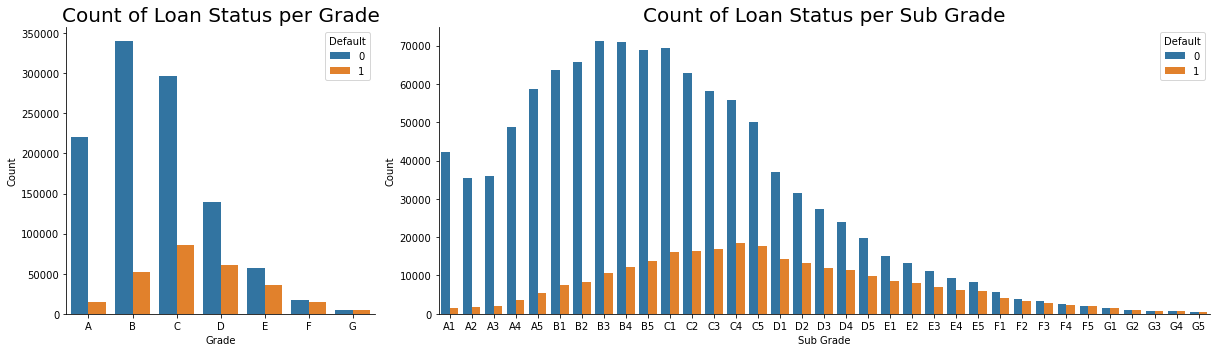

In [68]:
f, ax = plt.subplots(1, 2, figsize=(17,5), gridspec_kw={'width_ratios': [2, 5]})
sns.countplot(x='grade', hue='Default', data=df, order=sorted(df['grade'].unique()), ax=ax[0])
sns.countplot(x='sub_grade', data=df, hue = 'Default', order=sorted(df['sub_grade'].unique()), ax=ax[1])
sns.despine()
ax[0].set(xlabel='Grade', ylabel='Count')
ax[0].set_title('Count of Loan Status per Grade', size=20)
ax[1].set(xlabel='Sub Grade', ylabel='Count')
ax[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()


I prefer to work on the larger classification of grades, i.e- sub_grades. So I will drop the grades column.

In [69]:
df.drop('grade', axis=1, inplace=True)

### `Emp_titles and Emp_length:`

In [70]:
emp_titles = df['emp_title'].unique()
print(emp_titles)

['leadman' 'Engineer' 'truck driver' ... 'personal investor'
 'Sr. Photo Producer' 'Exec Dir Internal Audit']


In [71]:
print(len(emp_titles))

378354


In [72]:
print(df.emp_title.isna().sum())
print(df.emp_title.nunique())

85785
378353


In [73]:
df['emp_title'].value_counts()[:20]

Teacher               21268
Manager               19470
Owner                 10302
Registered Nurse       8774
RN                     8522
Supervisor             8289
Driver                 7558
Sales                  7487
Project Manager        6381
Office Manager         5526
General Manager        5191
Director               5032
owner                  4585
manager                4511
Engineer               4294
President              4162
teacher                4094
Vice President         3539
driver                 3514
Operations Manager     3457
Name: emp_title, dtype: int64

Majority of defaulted loans came from borrowers over 10+ length of employment, however that is because the count of borrowers in that category is also the highest. Looking at the graph, it is still hard to figure out which category of borrowers has the highest percentage of default.

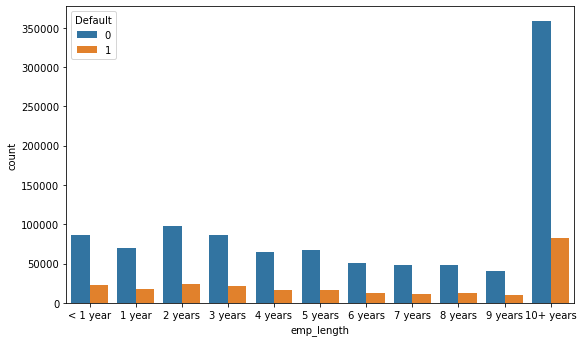

In [74]:
plt.figure(figsize =(20, 12))
plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
p_1 = sns.countplot(x='emp_length', data=df, hue='Default', order=order)
p_1.set_xticklabels(p_1.get_xticklabels());


[]

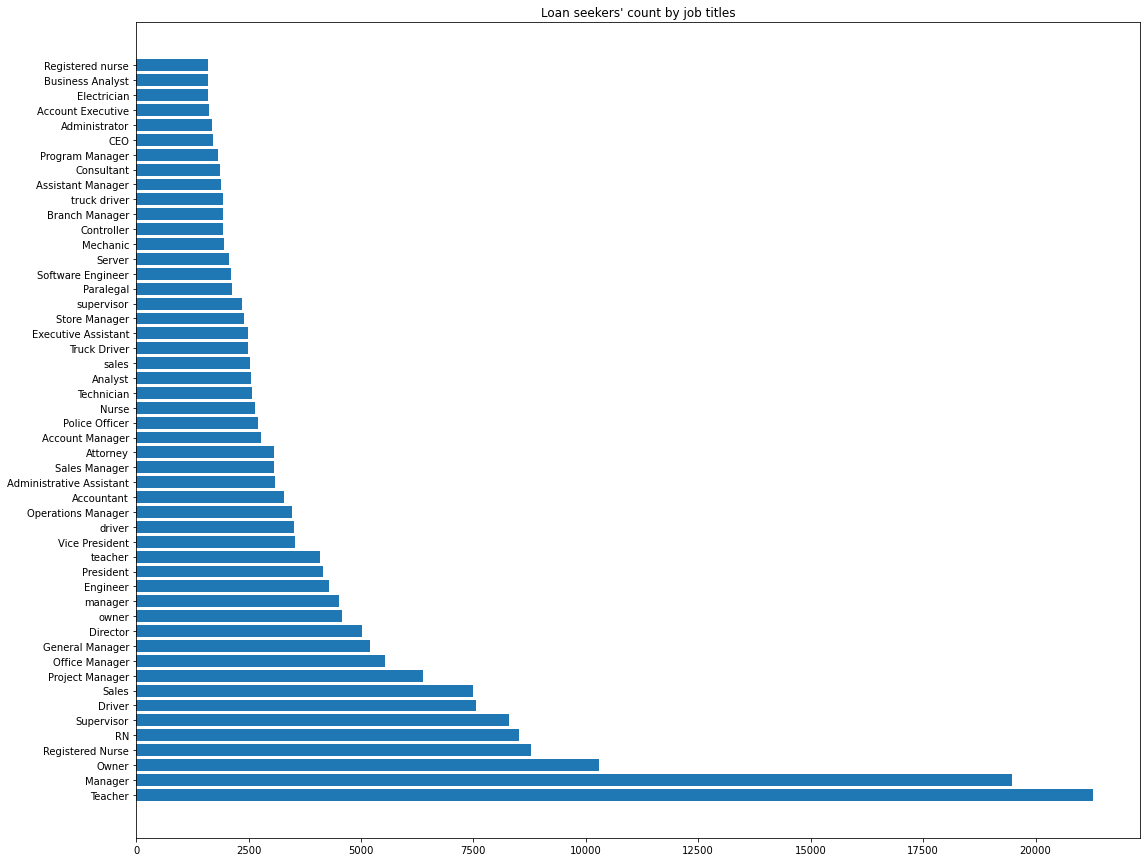

In [75]:
plt.figure(figsize =(18, 15))
plt.barh(df.emp_title.value_counts()[:50].index, df.emp_title.value_counts()[:50])
plt.title("Loan seekers' count by job titles")
plt.plot()

### `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
> - `verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified
> - `purpose`: A category provided by the borrower for the loan request.

In [76]:
df['home_ownership'].value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

It is better to join 'none', 'any' and 'other' together. We put everything under 'Other'.

In [77]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

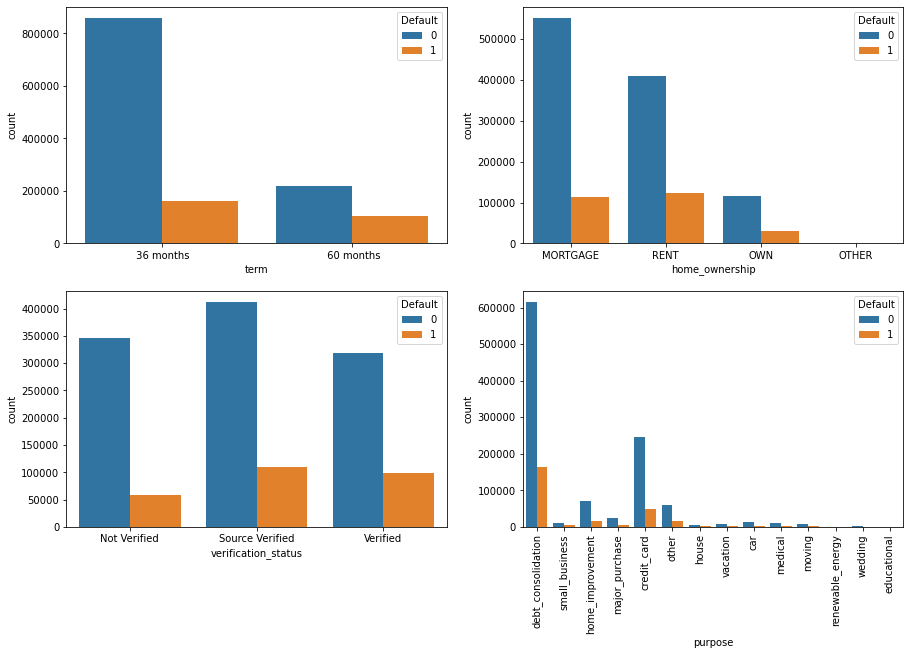

In [78]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='Default')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='Default')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='Default')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='Default')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Looking at the counts of each 'purpose', we see there are only 14 purposes reported for getting a personal loan from lending club. That is an interesting fact.

In [79]:
df['purpose'].value_counts()

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

In [80]:
df.loc[df['home_ownership']=='OTHER', 'Default'].value_counts()

0    388
1     90
Name: Default, dtype: int64

### `Missing Data:`

Looks like we still have a lot of missing values in our dataframe.

In [81]:
missing_df = df.isnull().mean()
print((missing_df*100))


id                       0.000000
loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
sub_grade                0.000000
emp_title                6.376597
emp_length               5.835904
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
purpose                  0.000000
title                    1.238302
addr_state               0.000000
dti                      0.027800
earliest_cr_line         0.000000
fico_range_low           0.000000
fico_range_high          0.000000
revol_util               0.063703
initial_list_status      0.000000
last_pymnt_amnt          0.000000
application_type         0.000000
acc_open_past_24mths     3.514506
avg_cur_bal              5.021073
bc_open_to_buy           4.544900
bc_util                  4.602062
mo_sin_old_rev_tl_op     5.019512
mo_sin_rcnt_rev_tl_op    5.019512
mort_acc                 3.514506
num_actv_rev_t

We will deal with all the missing values in the data pre-processing notebook. For now, we will continue exploring all the variables.

### Further Exploration 

We notice that the 'purpose' and 'title' column has overlapping categories, i.e- debt_consolidation, credit_card, home_improvement, etc. Both represent the reasons why the personal loan was taken. We notice further that purpose only has 14 unique categories and title has 61683 unique categories. So we will have to drop one and organize the other.

In [82]:
df['title'].value_counts()

Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
                            ...  
Legal payment                   1
Home Fixins                     1
Used Car Loan                   1
New Prospects Loan              1
Repay loans                     1
Name: title, Length: 61682, dtype: int64

In [83]:
x = len(df['title'].unique())
print(x)

61683


In [84]:
df.title.isna().sum()

16659

In [85]:
df.title.value_counts()[:10]

Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
Debt Consolidation          15695
Medical expenses            13576
Business                    11750
Car financing               11220
Vacation                     8046
Name: title, dtype: int64

In [86]:
df.purpose.value_counts()[:10]

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
Name: purpose, dtype: int64

We choose to drop the "title" column because the "purpose" column which is generated from it.

In [87]:
df = df.drop("title", axis ='columns')

##  `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
> - `open_acc`: The number of open credit lines in the borrower's credit file.
> - `revol_bal`: Total credit revolving balance
> - `revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
> - `total_acc`: The total number of credit lines currently in the borrower's credit file

In [88]:
df.dti.value_counts()

18.00     995
19.20     991
14.40     971
16.80     951
15.60     918
         ... 
64.72       1
57.24       1
114.90      1
66.71       1
55.82       1
Name: dti, Length: 7067, dtype: int64

In [89]:
print(df[df['dti']>=40].shape)

(6770, 30)


In [90]:
df.loc[df['dti']>=50, 'Default'].value_counts()

0    1980
1     797
Name: Default, dtype: int64

In [91]:
df.loc[df['dti']<=10, 'Default'].value_counts()

0    209542
1     36637
Name: Default, dtype: int64

In [92]:
dti_plot = df[df['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)
dti_plot

:Histogram   [dti]   (dti_count)

In [93]:
np.std(df['dti'])

11.16044155970779

In [94]:
df.dti.mean()

18.282666915004473

We can see that the distribution of the dti is pretty much normally distributed with a mean of 18.28 and standard deviation equal to 11.16.

## Conclusion:
​
In this exploratory data analysis we managed to drop some features that were redundant and overlapping with some other categories. We also managed to make some important findings after doing some data visualization. We noticed that there were two types of features- 1) features which are related to the applicant of the loans(employee title, employment length, etc) 2) features that are related to the loan characteristics(amount of loan, interest rate, etc.

In the next section, which is data pre-processing, we will further narrow down the dataframe, to include only the features that are essential for model building.  